In [132]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [134]:
from sklearn.datasets import make_classification, make_blobs

# Разделяющая граница

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
from mlxtend.plotting import plot_decision_regions

In [137]:
def generated_entangled_clouds():
    X1, Y1 = make_blobs(n_features=2, centers=1)
    X2, Y2 = make_blobs(n_features=2, centers=1)
    Y2 = np.ones_like(Y2)
    X1 -= np.mean(X1, axis=0)
    X2 -= np.mean(X2, axis=0)
    X2 += 1
    X = np.vstack((X1, X2)); Y = np.hstack((Y1, Y2))
    return X, Y

In [138]:
X, Y = generated_entangled_clouds()

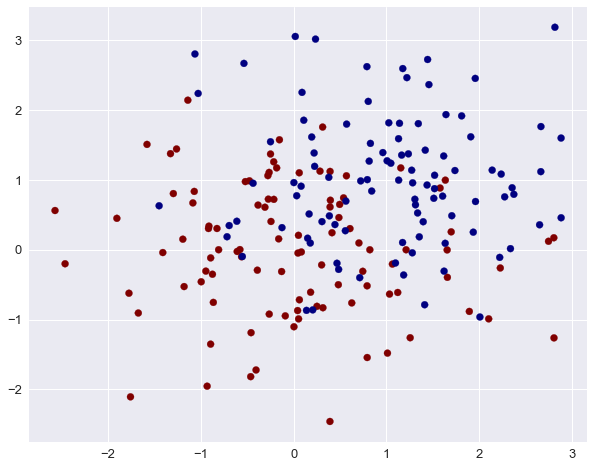

In [139]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, cmap=plt.cm.jet_r);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1</h3> 
    </div>
</div>

Постройте __DecisionTree__ из пакета __sklearn.tree__ на выборке _X, Y_, нарисуйте разделяющую границу с помощью __mlxtend.plotting.plot_decision_regions__.

Сравните с разделяющей границей других известных вам классификаторов.

Убедитесь, что вы переобучили дерево, и достигается нулевая ошибка на обучающей выборке.

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2</h3> 
    </div>
</div>

Создайте еще пару деревьев, повторите процедуру, нарисуйте разделяющую границу. Объясните, почему она выходит различной от раза к разу.

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3</h3> 
    </div>
</div>

Вооружитесь готовым кодом ниже. Это - данные о пассажирах Титаника: где они сидели, сколько им было лет, плыли ли они в одиночку или с родней и так далее. Требуется предсказать, выжил ли пассажир. Такую задачу вы решать уже, безусловно, умеете.

Возьмите __validation_curve__ из __sklearn.model_selection__. С помощью этой функции постройте графики ошибок при различных значениях гиперпараметров:

* __n_estimators__ - один из самых важных параметров!
* __max_features__ - один из самых важных параметров!
* __min_samples_split__ 
* __min_samples_leaf__
* __max_depth__ 

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [1]:
def get_preprocessed_titanic():
    df = sns.load_dataset('titanic')

    X, y = df.drop(['survived'], axis=1), df.survived

    X["embarked"] = X["embarked"].fillna("S")
    X["fare"].fillna(X["fare"].median(), inplace=True)
    X["embark_town"] = X["embark_town"].fillna(X.embark_town.value_counts().index[0]) 
    
    average_age_titanic   = X["age"].mean()
    std_age_titanic       = X["age"].std()
    count_nan_age_titanic = X["age"].isnull().sum()
    rand_1 = np.random.randint(average_age_titanic - std_age_titanic, 
                               average_age_titanic + std_age_titanic, 
                               size=count_nan_age_titanic)
    X["age"][np.isnan(X["age"])] = rand_1

    X.drop(['deck', 'alive'], axis=1, inplace=True)
    
    return X, y

In [8]:
df = sns.load_dataset('titanic')

In [4]:
X, y = get_preprocessed_titanic()

_Лайфхак_: преврати все подряд в one-hot-закодированное все подряд с помощью __pd.get_dummies__!

In [5]:
X = pd.get_dummies(X)

In [6]:
X.shape

(891, 21)